<img src='https://www.anadronestarting.com/wp-content/uploads/intel-main_opt.png' width=50%>

# 모바일넷을 이용한 이미지분류
<font size=5><b>(Image Classification using Mobilenet)<b></font>

<div align='right'>성  민  석<br>(Minsuk Sung)</div>

<img src='https://gitcdn.xyz/cdn/Tony607/blog_statics/9ddd48eb623175fb734e63865ebe604351c64c61/images/openvino/openvino.png' width=50%>

---

<h1>강의목차<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Keras-h5-파일을-Tensorflow-pb파일로-변환" data-toc-modified-id="Keras-h5-파일을-Tensorflow-pb파일로-변환-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Keras h5 파일을 Tensorflow pb파일로 변환</a></span></li><li><span><a href="#Tensorflow-pb파일을-OpenVINO-xml,-bin파일로-변환" data-toc-modified-id="Tensorflow-pb파일을-OpenVINO-xml,-bin파일로-변환-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tensorflow pb파일을 OpenVINO xml, bin파일로 변환</a></span></li><li><span><a href="#OpenVINO에서-xml,bin파일로-추론" data-toc-modified-id="OpenVINO에서-xml,bin파일로-추론-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>OpenVINO에서 xml,bin파일로 추론</a></span></li><li><span><a href="#Reference" data-toc-modified-id="Reference-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Reference</a></span></li></ul></div>

<img src='https://gitcdn.xyz/cdn/Tony607/blog_statics/73e93019d8a9dafd0b5a0fe200e982b75d50bf21/images/keras-tf/keras_tf_pb.png' width=50%>

## Keras h5 파일을 Tensorflow pb파일로 변환

In [8]:
%run ./utils/keras_to_freeze_binary.py ./bin/fashion_mnist_cnn.h5 ./bin/fashion_mnist

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


[ WARNING ]  From %s: calling %s (from %s) with %s is deprecated and will be removed %s.
Instructions for updating:
%s


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


[ WARNING ]  From %s: calling %s (from %s) with %s is deprecated and will be removed %s.
Instructions for updating:
%s


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


[ WARNING ]  From %s: calling %s (from %s) with %s is deprecated and will be removed %s.
Instructions for updating:
%s


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              3277824   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0

[ WARNING ]  From %s: %s (from %s) is deprecated and will be removed %s.
Instructions for updating:
%s


Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`


[ WARNING ]  From %s: %s (from %s) is deprecated and will be removed %s.
Instructions for updating:
%s


INFO:tensorflow:Froze 8 variables.


[ INFO ]  Froze %d variables.


INFO:tensorflow:Converted 8 variables to const ops.


[ INFO ]  Converted %d variables to const ops.


COMPLETE CONVERTING h5 to pb FILE


<img src='https://software.intel.com/sites/default/files/managed/b7/e3/webops12032-diagram-of-flow-750.jpg'>

## Tensorflow pb파일을 OpenVINO xml, bin파일로 변환

In [9]:
%run /opt/intel/openvino/deployment_tools/model_optimizer/mo.py \
    --framework tf \
    --input_model ./bin/fashion_mnist.pb \
    --batch 1 \
    --data_type FP32 \
    --output_dir bin/

Model Optimizer arguments:
Common parameters:
	- Path to the Input Model: 	/home/intel/imobilenet/./bin/fashion_mnist.pb
	- Path for generated IR: 	/home/intel/imobilenet/bin/
	- IR output name: 	fashion_mnist
	- Log level: 	ERROR
	- Batch: 	1
	- Input layers: 	Not specified, inherited from the model
	- Output layers: 	Not specified, inherited from the model
	- Input shapes: 	Not specified, inherited from the model
	- Mean values: 	Not specified
	- Scale values: 	Not specified
	- Scale factor: 	Not specified
	- Precision of IR: 	FP32
	- Enable fusing: 	True
	- Enable grouped convolutions fusing: 	True
	- Move mean values to preprocess section: 	False
	- Reverse input channels: 	False
TensorFlow specific parameters:
	- Input model in text protobuf format: 	False
	- Path to model dump for TensorBoard: 	None
	- List of shared libraries with TensorFlow custom layers implementation: 	None
	- Update the configuration file with input/output node names: 	None
	- Use configuration file used to 

[ WARNING ]  From %s: The name %s is deprecated. Please use %s instead.



[ WARNING ]  From %s: The name %s is deprecated. Please use %s instead.



[ WARNING ]  From %s: The name %s is deprecated. Please use %s instead.




[ SUCCESS ] Generated IR model.
[ SUCCESS ] XML file: /home/intel/imobilenet/bin/fashion_mnist.xml
[ SUCCESS ] BIN file: /home/intel/imobilenet/bin/fashion_mnist.bin
[ SUCCESS ] Total execution time: 1.85 seconds. 


## OpenVINO에서 xml,bin파일로 추론

In [10]:
import os
# assert 'computer_vision_sdk' in os.environ['PYTHONPATH']

from PIL import Image
import numpy as np

try:
    from openvino import inference_engine as ie
    from openvino.inference_engine import IENetwork, IEPlugin
except Exception as e:
    exception_type = type(e).__name__
    print("The following error happened while importing Python API module:\n[ {} ] {}".format(exception_type, e))
    sys.exit(1)
    
    
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

In [12]:
# Plugin initialization for specified device and load extensions library if specified.
plugin_dir = None
model_xml = './bin/fashion_mnist.xml'
model_bin = './bin/fashion_mnist.bin'

In [13]:
# Devices: GPU (intel), CPU, MYRIAD
# plugin = IEPlugin("MYRIAD", plugin_dirs=plugi)
plugin = IEPlugin("CPU")

In [14]:
# Read IRn_dir
net = IENetwork.from_ir(model=model_xml, weights=model_bin)
assert len(net.inputs.keys()) == 1
assert len(net.outputs) == 1
input_blob = next(iter(net.inputs))
out_blob = next(iter(net.outputs))

/home/intel/imobilenet/myvenv/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: from_ir() method of IENetwork is deprecated. Please use IENetwork class constructor to create valid IENetwork instance
  


In [15]:
# Load network to the plugin
exec_net = plugin.load(network=net)
del net

In [17]:
import pandas as pd

In [18]:
test = pd.read_csv('./data/fashion-mnist/fashion-mnist_test.csv')
X_test = np.array(test.iloc[:, 1:])
y_test = np.array(test.iloc[:, 0])

In [44]:
def get_classlabel(code):
    label = {0: 'T-Shirt',
             1: 'Pants',
             2: 'Pullover',
             3: 'Dress',
             4: 'Coat',
             5: 'Sandle',
             6: 'Shirt',
             7: 'Sneakers',
             8: 'Bag',
             9: 'AnkleBoots'}
    return label[code]

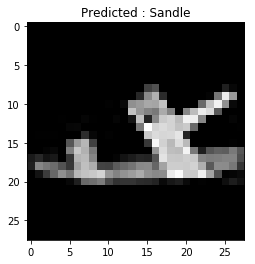

In [79]:
import random
idx = random.randint(0,len(X_test))

# infer using OpenVINO
res = exec_net.infer(inputs={input_blob: X_test[idx].reshape(1,1,28,28)})

# Access the results and get the index of the highest confidence score
output_node_name = list(res.keys())[0]
res = res[output_node_name]

# Predicted class index.
pidx = np.argsort(res[0])[-1]

# decode the predictions
plt.imshow(X_test[idx].reshape(28,28),cmap='gray')
plt.title('Predicted : {}'.format(get_classlabel(pidx)))
plt.show()

## Reference

- Intel
    - https://www.intel.co.kr/
- Intel OpenVINO
    - https://software.intel.com/en-us/openvino-toolkit
- MNIST
    - http://yann.lecun.com/exdb/mnist/
- CIFAR10
    - https://www.cs.toronto.edu/~kriz/cifar.html
- ImageNet
    - http://www.image-net.org
- Tensorflow
    - https://www.tensorflow.org/?hl=ko
- Keras
    - https://keras.io/
    - https://tensorflow.blog/2019/03/06/tensorflow-2-0-keras-api-overview/
    - https://tykimos.github.io/2017/02/22/Integrating_Keras_and_TensorFlow/
    - https://tykimos.github.io/2017/03/08/CNN_Getting_Started/
    - https://raw.githubusercontent.com/keras-team/keras-docs-ko/master/sources/why-use-keras.md
- Keras to Caffe
     - https://github.com/uhfband/keras2caffe
     - http://www.deepvisionconsulting.com/from-keras-to-caffe/
- Fully Connected Layer
    - https://sonofgodcom.wordpress.com/2018/12/31/cnn%EC%9D%84-%EC%9D%B4%ED%95%B4%ED%95%B4%EB%B3%B4%EC%9E%90-fully-connected-layer%EB%8A%94-%EB%AD%94%EA%B0%80/
- Convultional Nueral Network
    - http://aikorea.org/cs231n/convolutional-networks/
    - http://cs231n.stanford.edu/
- CNN Models
    - https://ratsgo.github.io/deep%20learning/2017/10/09/CNNs/

- VOC2012
    - https://blog.godatadriven.com/rod-keras-multi-label
    - https://gist.github.com/rragundez/ae3a17428bfec631d1b35dcdc6296a85#file-multi-label_classification_with_keras_imagedatagenerator-ipynbhttps://fairyonice.github.io/Part_5_Object_Detection_with_Yolo_using_VOC_2012_data_training.html
    - http://research.sualab.com/introduction/2017/11/29/image-recognition-overview-1.html